In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank.csv")
df = df.drop(["day", "month"], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,673,2,-1,0,unknown,yes


# **Handling Missing Values Using Impution** (Approach: Most Frequent)

In [3]:
# Replacing missing values with the most frequent category
categorical_columns_with_missing = ["job", "education", "contact", "poutcome"]
for col in categorical_columns_with_missing:
    most_frequent_value = df[col].mode()[0] 
    df[col] = df[col].replace("unknown", most_frequent_value)

# **Target Variable Binary Encoding**

In [4]:
df["deposit"] = df["deposit"].map({"yes": 1, "no": 0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,cellular,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,cellular,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,cellular,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,cellular,673,2,-1,0,unknown,1


# **One-Hot Encoding for Categorigal Features**

In [5]:
categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Moving 'deposit' column to the last position
deposit_column = df.pop("deposit")
df["deposit"] = deposit_column

df = df.astype(int)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,2343,1042,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
1,56,45,1467,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,41,1270,1389,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
3,55,2476,579,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
4,54,184,673,2,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


# **Class Distribution**

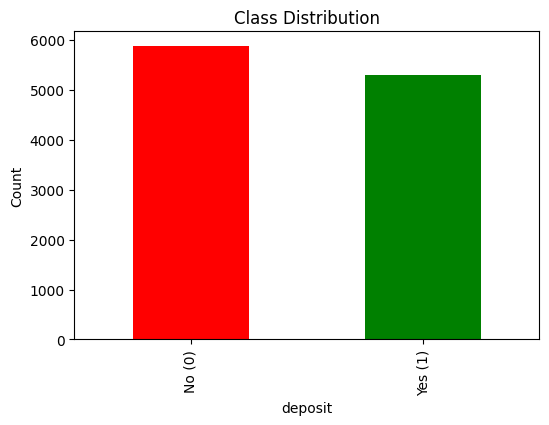

deposit
0    5873
1    5289
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(6, 4))
df["deposit"].value_counts().plot(kind="bar", color=["red", "green"])
plt.xticks(ticks=[0, 1], labels=["No (0)", "Yes (1)"])
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

print(df["deposit"].value_counts())

# **Correlation Among Features**

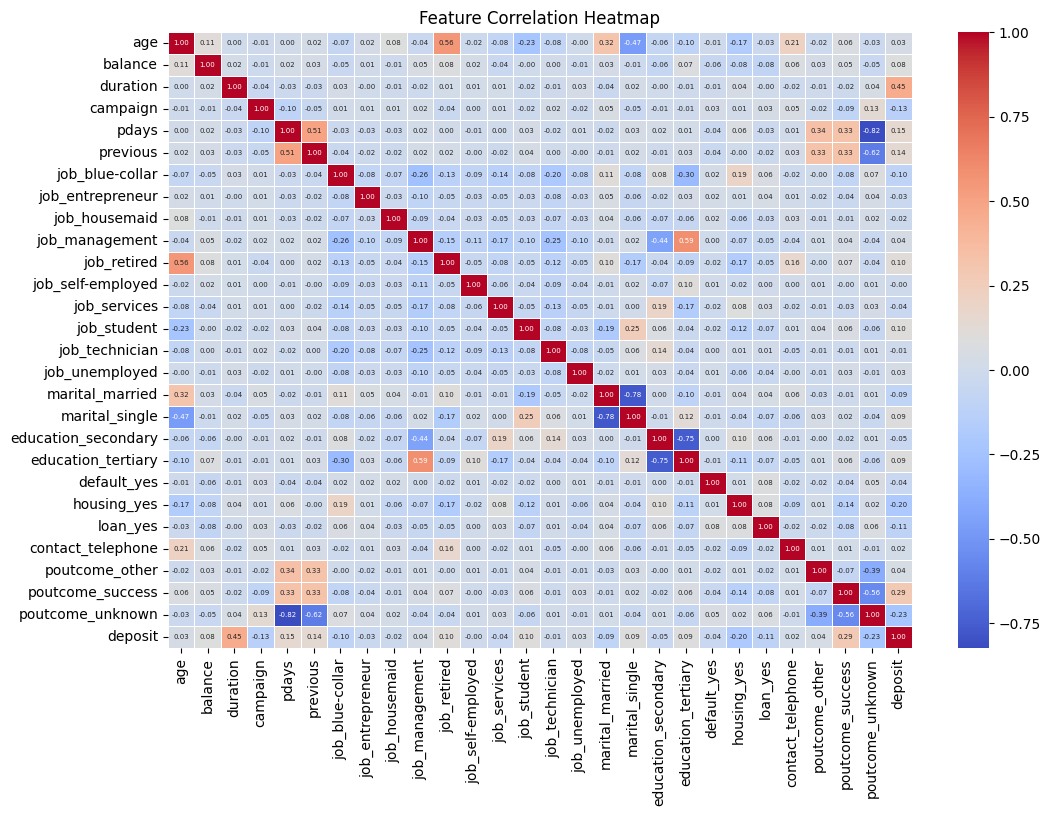

In [7]:
import seaborn as sns

correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title("Feature Correlation Heatmap")
plt.show()

**Removing Highly Correlated Features with a Threshold of 0.75**

In [8]:
threshold = 0.75

# Identifying highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  
            colname = correlation_matrix.columns[i]  
            correlated_features.add(colname)

# Getting hold of features strongly correlated with 'deposit'
important_features = correlation_matrix["deposit"].abs().sort_values(ascending=False).index[:10]

# Removing only the correlated features that are not in the top important features
features_to_remove = [feature for feature in correlated_features if feature not in important_features]

df_selected = df.drop(columns=features_to_remove)
df_selected.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_married,education_secondary,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,2343,1042,1,-1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1
1,56,45,1467,1,-1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
2,41,1270,1389,1,-1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1
3,55,2476,579,1,-1,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,1
4,54,184,673,2,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


# **Outlier Detection**

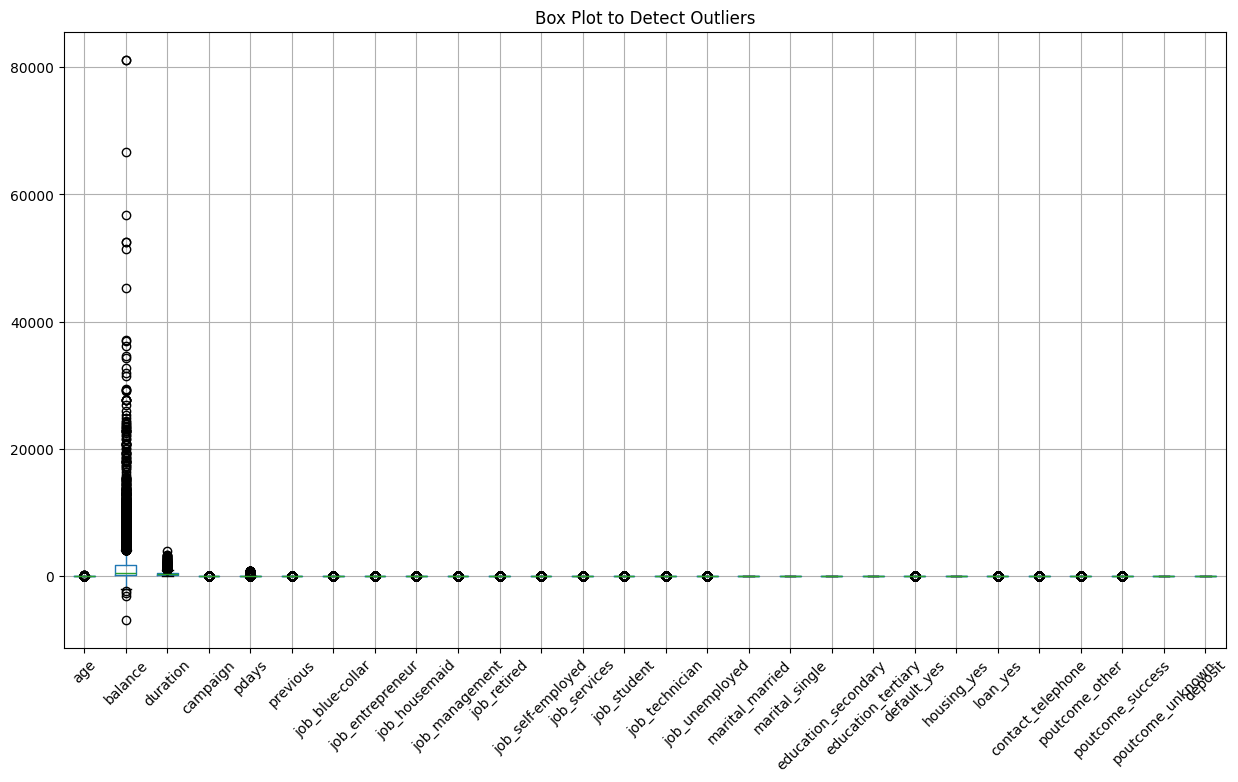

In [9]:
# Box plots to visualize outliers
plt.figure(figsize=(15, 8))
df.select_dtypes(include=['number']).boxplot(rot=90)
plt.title("Box Plot to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

**Removing outliers using IQR method**

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing them
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df_cleaned.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success,poutcome_unknown,deposit
4,54,184,673,2,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
10,38,100,786,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
20,28,785,442,2,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
28,31,307,538,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
55,40,1535,704,1,-1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1


# **Normalization**

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
df_normalized.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,0.733333,0.293072,0.662687,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.377778,0.277676,0.775124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.155556,0.403226,0.432836,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.222222,0.315616,0.528358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.422222,0.540689,0.693532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Train & Test Split**

In [12]:
from sklearn.model_selection import train_test_split

X = df_normalized.drop(columns=["deposit"])
y = df_normalized["deposit"]

# Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Dimensionality Reduction**: PCA

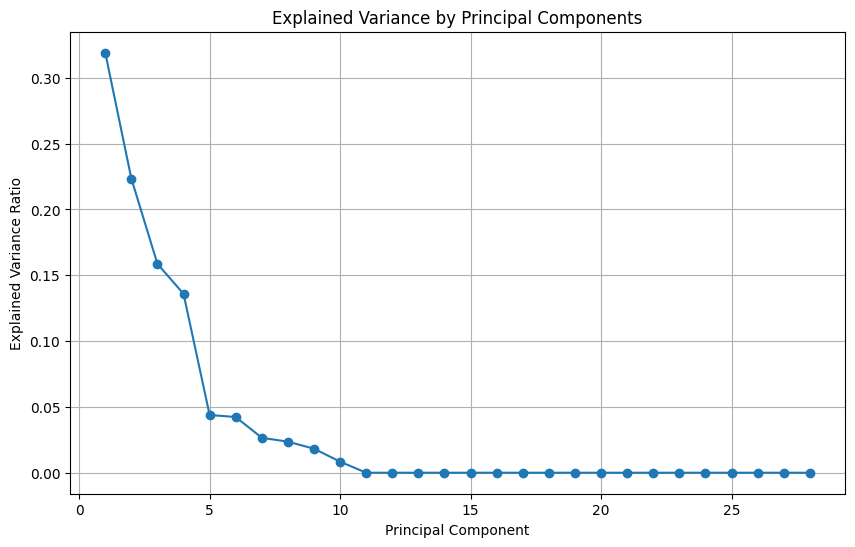

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(df_normalized)

# Variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Plotting the variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="-")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()

**Choosing an Optimal Number of Principal Components**

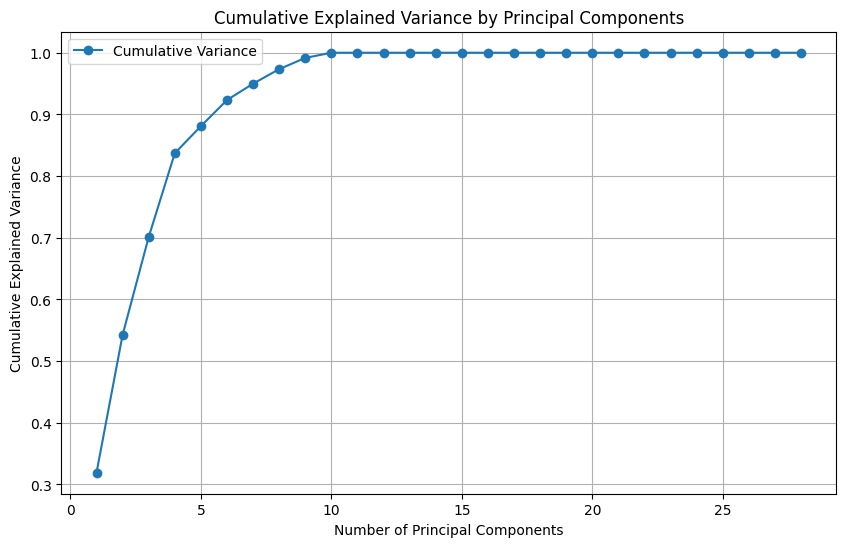

In [14]:
# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
optimal_components = next(i for i, v in enumerate(cumulative_variance) if v >= 0.85) + 1

# Ploting cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o", linestyle="-", label="Cumulative Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.legend()
plt.grid()
plt.show()

# *According to Kaiser rule, we have to opt for at least 8 components. However, in order to overcome overfitting, I  choose 2 principal components empirically.*

In [15]:
# Performing PCA again with 2 components
pca_final = PCA(n_components=2)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

**Visulaizing Training Data with the 2 Principal Components**

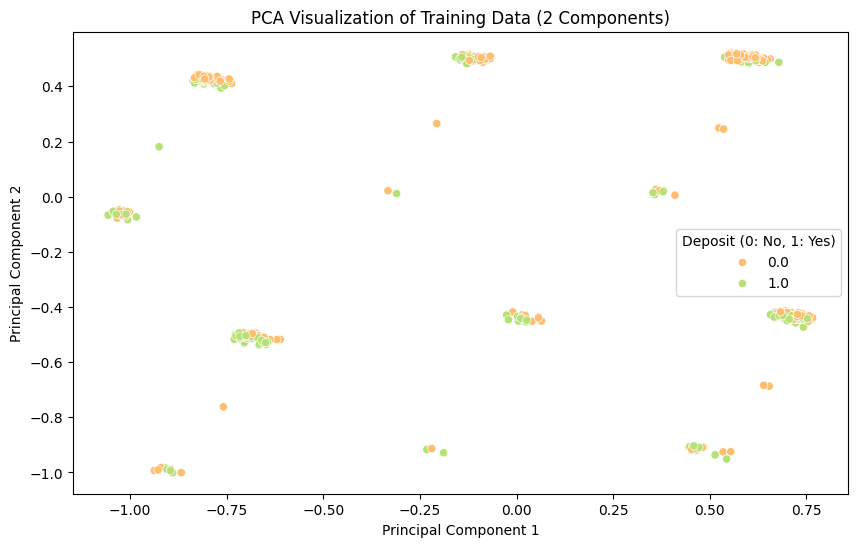

In [18]:
# Converting to DataFrame for visualization
df_train_pca = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])
df_train_pca["deposit"] = y_train.values

# Plot PCA visualization for Training Set
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train_pca, x="PC1", y="PC2", hue="deposit", palette="RdYlGn")
plt.title("PCA Visualization of Training Data (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Deposit (0: No, 1: Yes)")
plt.show()

# **SVM, XGBoost, Random Forest, logistic Regression and KNN**

# *Please note that all the models were validated using 5-fold cross validation individually, not the test set defined earlier.*

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


models = {
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# 5-fold cross-validation on all the models
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    }

cv_results_df = pd.DataFrame.from_dict(cv_results, orient='index')
print("\nCross-Validation Results:")
print(cv_results_df)

c:\Users\DataSystem\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:59:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DataSystem\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:59:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DataSystem\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:59:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label


Cross-Validation Results:
                     Mean Accuracy   Std Dev
SVM                       0.642380  0.045424
XGBoost                   0.670453  0.057128
Random Forest             0.700514  0.026719
Logistic Regression       0.657480  0.049780
KNN                       0.685484  0.051287


# **Ensemble Learning**

In [20]:
ensemble_model = VotingClassifier(
    estimators=[(name, model) for name, model in models.items()],
    voting='hard'
)

ensemble_model.fit(X_train_pca, y_train)

c:\Users\DataSystem\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:59:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('SVM', SVC(random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            in...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(random_state=42)),
                             ('KNN', KNeighborsClassifier())])

# **Test**

In [21]:
y_pred_ensemble = ensemble_model.predict(X_test_pca)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_report = classification_report(y_test, y_pred_ensemble)

# Results
print("\nFinal Ensemble Model Performance on Test Set:")
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")
print("\nEnsemble Classification Report:")
print(ensemble_report)


Final Ensemble Model Performance on Test Set:
Ensemble Accuracy: 0.7179

Ensemble Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79        72
         1.0       0.70      0.47      0.56        45

    accuracy                           0.72       117
   macro avg       0.71      0.67      0.68       117
weighted avg       0.71      0.72      0.70       117

